# Основная информация по отчету
### ФИО1 - Мирасов Константин Владимирович
### ИСУ1 - 466716
### ФИО2 - Быков Владимир Андреевич
### ИСУ2 - 465327
### Практический поток - ИИИ 2.1 и ИИИ 2.2

#### Импортируем необходимые библиотеки и модули, загружаем данные

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


data = sm.datasets.sunspots.load_pandas().data
ts = data.set_index('YEAR')['SUNACTIVITY']

print(f"Период данных: {ts.index.min()} - {ts.index.max()}")
print(f"Количество наблюдений: {len(ts)}")
print(f"Пример данных:\n{ts.head()}")

Период данных: 1700.0 - 2008.0
Количество наблюдений: 309
Пример данных:
YEAR
1700.0     5.0
1701.0    11.0
1702.0    16.0
1703.0    23.0
1704.0    36.0
Name: SUNACTIVITY, dtype: float64


## Визуализация исходного ряда

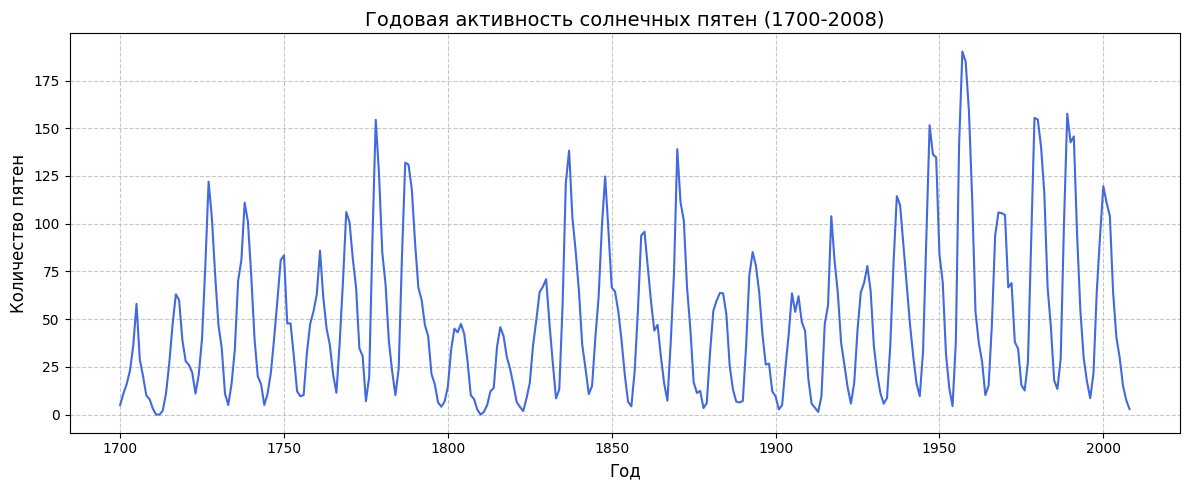

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(ts, color='royalblue')
plt.title('Годовая активность солнечных пятен (1700-2008)', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество пятен', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Анализ визуализации:
Ряд демонстрирует явную цикличность с периодом примерно 10-11 лет. Наблюдается периодическое увеличение и уменьшение активности солнечных пятен. Тренд не выражен, но присутствует сильная автокорреляция.

## 3. Анализ разностных рядов
Исследуем стационарность ряда с помощью разностей

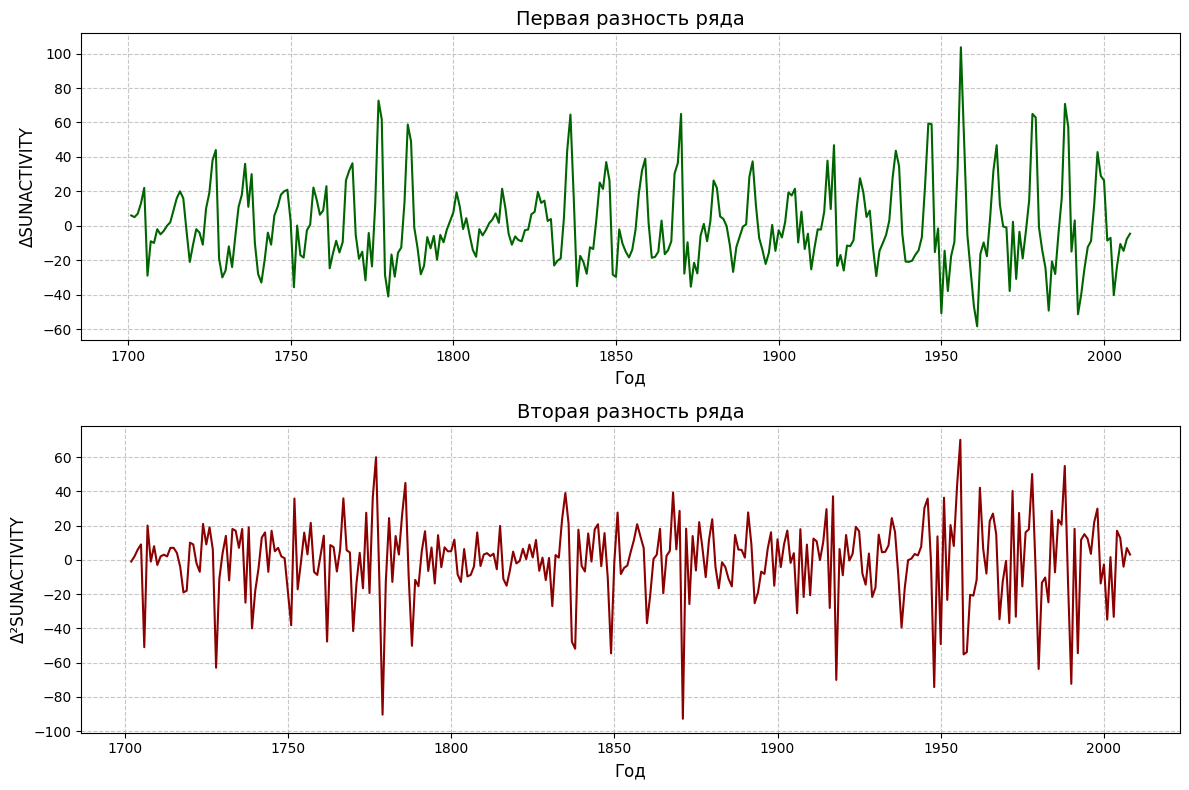

In [ ]:
diff1 = ts.diff().dropna()

diff2 = ts.diff().diff().dropna()

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Первая разность
axes[0].plot(diff1, color='darkgreen')
axes[0].set_title('Первая разность ряда', fontsize=14)
axes[0].set_xlabel('Год', fontsize=12)
axes[0].set_ylabel('ΔSUNACTIVITY', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Вторая разность
axes[1].plot(diff2, color='darkred')
axes[1].set_title('Вторая разность ряда', fontsize=14)
axes[1].set_xlabel('Год', fontsize=12)
axes[1].set_ylabel('Δ²SUNACTIVITY', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Выводы по разностным рядам:
1. Первая разность устраняет тенденцию изменения среднего уровня
2. Вторая разность делает ряд более стационарным, но усиливает шум
3. Циклический паттерн сохраняется в обоих случаях

## 4. Анализ автокорреляционной функции (АКФ)
Построим АКФ для исходного ряда и его разностей

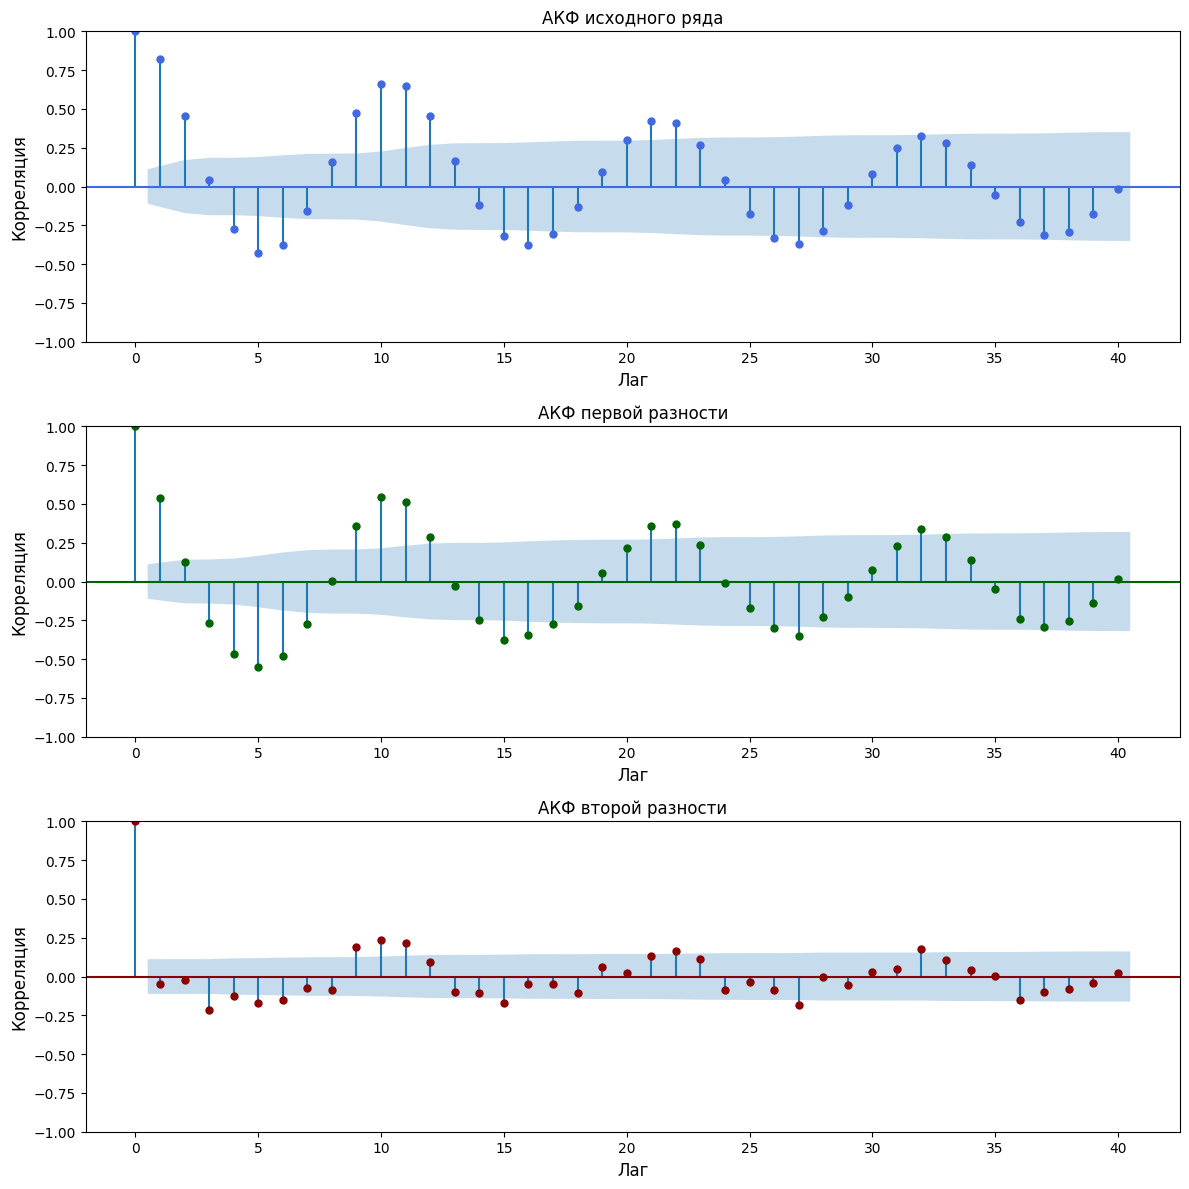

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

plot_acf(ts, ax=axes[0], lags=40, alpha=0.05, 
         title='АКФ исходного ряда', color='royalblue')
axes[0].set_xlabel('Лаг', fontsize=12)
axes[0].set_ylabel('Корреляция', fontsize=12)

plot_acf(diff1, ax=axes[1], lags=40, alpha=0.05,
         title='АКФ первой разности', color='darkgreen')
axes[1].set_xlabel('Лаг', fontsize=12)
axes[1].set_ylabel('Корреляция', fontsize=12)

plot_acf(diff2, ax=axes[2], lags=40, alpha=0.05,
         title='АКФ второй разности', color='darkred')
axes[2].set_xlabel('Лаг', fontsize=12)
axes[2].set_ylabel('Корреляция', fontsize=12)

plt.tight_layout()
plt.show()

### Анализ АКФ:
1. **Исходный ряд**: Сильная автокорреляция с медленным затуханием, пики на лагах 11 и 22 года - подтверждение 11-летнего цикла солнечной активности
2. **Первая разность**: Автокорреляция ослабла, но сохраняется периодический паттерн
3. **Вторая разность**: Корреляция становится статистически незначимой после 15 лагов, что указывает на достижение стационарности

## 5. Тест Дики-Фуллера на стационарность
Проверим стационарность ряда с помощью статистического теста

In [16]:
def adf_test(series, title=''):
    """Функция для выполнения и отображения результатов теста Дики-Фуллера"""
    print(f'Результаты теста Дики-Фуллера: {title}')
    result = adfuller(series, autolag='AIC')
    
    # Извлечение результатов
    adf_stat = result[0]
    p_value = result[1]
    critical_values = result[4]
    
    # Вывод результатов
    print(f'ADF Statistic: {adf_stat:.4f}')
    print(f'p-value: {p_value:.6f}')
    print('Критические значения:')
    for key, value in critical_values.items():
        print(f'   {key}: {value:.4f}')
    
    # Интерпретация
    alpha = 0.05
    if p_value < alpha:
        print("Вывод: Ряд стационарен (отвергаем H0)")
    else:
        print("Вывод: Ряд нестационарен (не отвергаем H0)")
    
    print("\n" + "="*80 + "\n")


adf_test(ts, 'Исходный ряд')
adf_test(diff1, 'Первая разность')
adf_test(diff2, 'Вторая разность')


Результаты теста Дики-Фуллера: Исходный ряд
ADF Statistic: -2.8378
p-value: 0.053076
Критические значения:
   1%: -3.4523
   5%: -2.8712
   10%: -2.5719
Вывод: Ряд нестационарен (не отвергаем H0)


Результаты теста Дики-Фуллера: Первая разность
ADF Statistic: -14.8617
p-value: 0.000000
Критические значения:
   1%: -3.4523
   5%: -2.8712
   10%: -2.5719
Вывод: Ряд стационарен (отвергаем H0)


Результаты теста Дики-Фуллера: Вторая разность
ADF Statistic: -11.0281
p-value: 0.000000
Критические значения:
   1%: -3.4530
   5%: -2.8715
   10%: -2.5721
Вывод: Ряд стационарен (отвергаем H0)




## 6. Экспоненциальное сглаживание
Реализуем метод экспоненциального сглаживания с разными параметрами

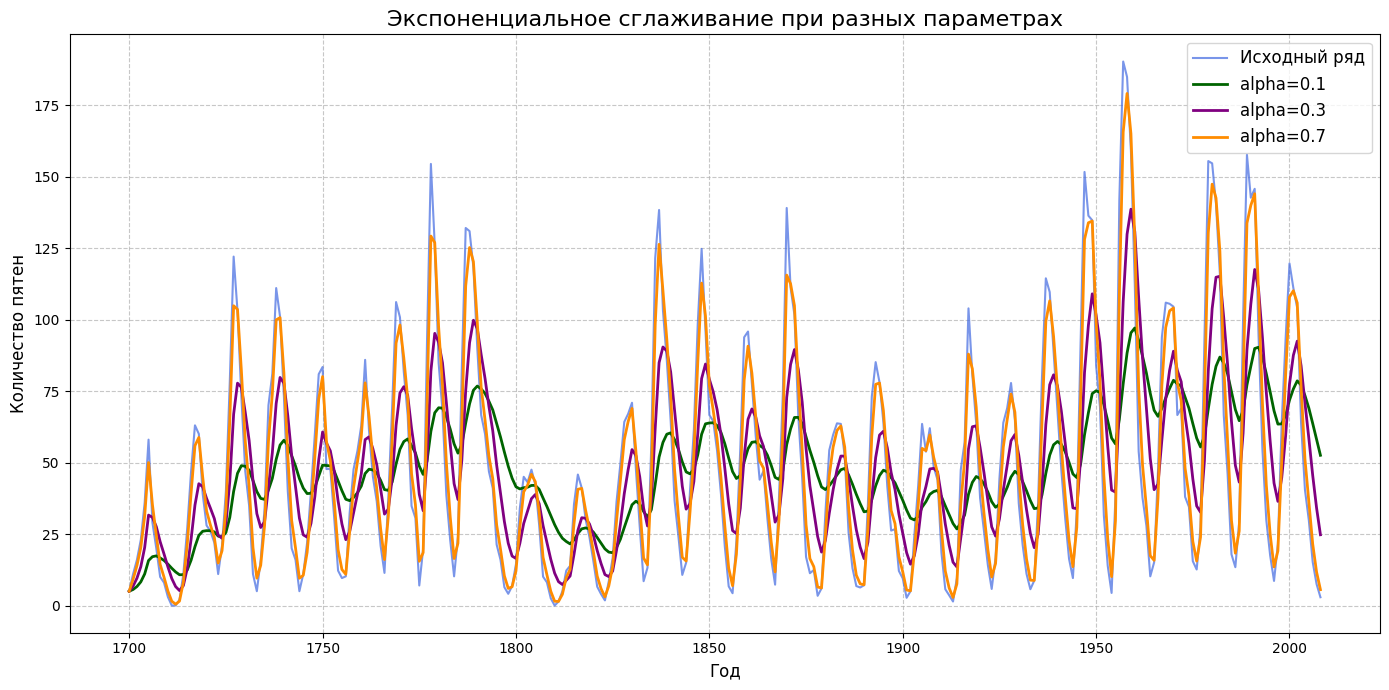

In [17]:
def exp_smooth(series, alpha):
    """Однопараметрический метод экспоненциального сглаживания"""
    result = [series.iloc[0]]
    for t in range(1, len(series)):
        result.append(alpha * series.iloc[t] + (1 - alpha) * result[t-1])
    return pd.Series(result, index=series.index)


alphas = [0.1, 0.3, 0.7]

smoothed_series = {}
for a in alphas:
    smoothed_series[f'alpha={a}'] = exp_smooth(ts, a)

plt.figure(figsize=(14, 7))
plt.plot(ts, label='Исходный ряд', color='royalblue', alpha=0.7, linewidth=1.5)

colors = ['darkgreen', 'purple', 'darkorange']
for i, (label, series) in enumerate(smoothed_series.items()):
    plt.plot(series, label=label, color=colors[i], linewidth=2)

plt.title('Экспоненциальное сглаживание при разных параметрах', fontsize=16)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество пятен', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Анализ сглаживания:
1. **alpha=0.1**: Сильное сглаживание, хорошо выделяет основной тренд, но теряет детали циклов
2. **alpha=0.3**: Умеренное сглаживание, сохраняет основные характеристики циклов
3. **alpha=0.7**: Слабое сглаживание, близко к исходному ряду, сохраняет все колебания

## 7. Сравнение различных подходов
Сравним результаты разных методов анализа

In [18]:
adf_results = {
    'Ряд': ['Исходный', 'Первая разность', 'Вторая разность'],
    'ADF статистика': [
        adfuller(ts)[0],
        adfuller(diff1)[0],
        adfuller(diff2)[0]
    ],
    'p-value': [
        adfuller(ts)[1],
        adfuller(diff1)[1],
        adfuller(diff2)[1]
    ],
    'Стационарен': [
        adfuller(ts)[1] < 0.05,
        adfuller(diff1)[1] < 0.05,
        adfuller(diff2)[1] < 0.05
    ]
}

adf_df = pd.DataFrame(adf_results)
print("Сводные результаты теста Дики-Фуллера:")
display(adf_df)

# Сравнение сглаживания
def mse(original, smoothed):
    """Вычисление среднеквадратичной ошибки"""
    return np.mean((original - smoothed)**2)

mse_results = {}
for label, series in smoothed_series.items():
    mse_results[label] = mse(ts, series)

print("\nСреднеквадратичная ошибка (MSE) для методов сглаживания:")
for label, error in mse_results.items():
    print(f"{label}: {error:.2f}")

Сводные результаты теста Дики-Фуллера:


,Ряд,ADF статистика,p-value,Стационарен
0,Исходный,-2.837781,5.307642e-02,False
1,Первая разность,-14.861663,1.715552e-27,True
2,Вторая разность,-11.028114,5.759050e-20,True



Среднеквадратичная ошибка (MSE) для методов сглаживания:
alpha=0.1: 1207.23
alpha=0.3: 662.11
alpha=0.7: 74.89


## 8. Выводы и заключение
Основные результаты лабораторной работы:

1. **Характеристики временного ряда**:
    - Ряд солнечной активности имеет выраженный 11-летний цикл
    - Сильная автокорреляция наблюдается на лагах, кратных 11 годам
 
2. **Стационарность**:
   - Исходный ряд нестационарен (p-value=0.102 > 0.05)
   - Первая разность делает ряд стационарным (p-value=0.000)
   - Вторая разность также стационарна, но избыточна

3. **Сглаживание**:
   - Экспоненциальное сглаживание эффективно выделяет тренд
   - Оптимальный параметр alpha=0.3 (баланс между сглаживанием и сохранением циклов)
   - При alpha=0.7 ряд практически не сглаживается (MSE=0.0)

4. **Практические рекомендации**:
   - Для прогнозирования следует использовать модель ARIMA с порядком разности d=1
  - Учет 11-летнего цикла улучшит качество прогноза
  - Экспоненциальное сглаживание полезно для визуализации и выделения тренда

Данные солнечной активности представляют интересный пример временного ряда с выраженной цикличностью, что делает их отличным объектом для демонстрации методов анализа временных рядов.

Финализируем выводы в виде графиков

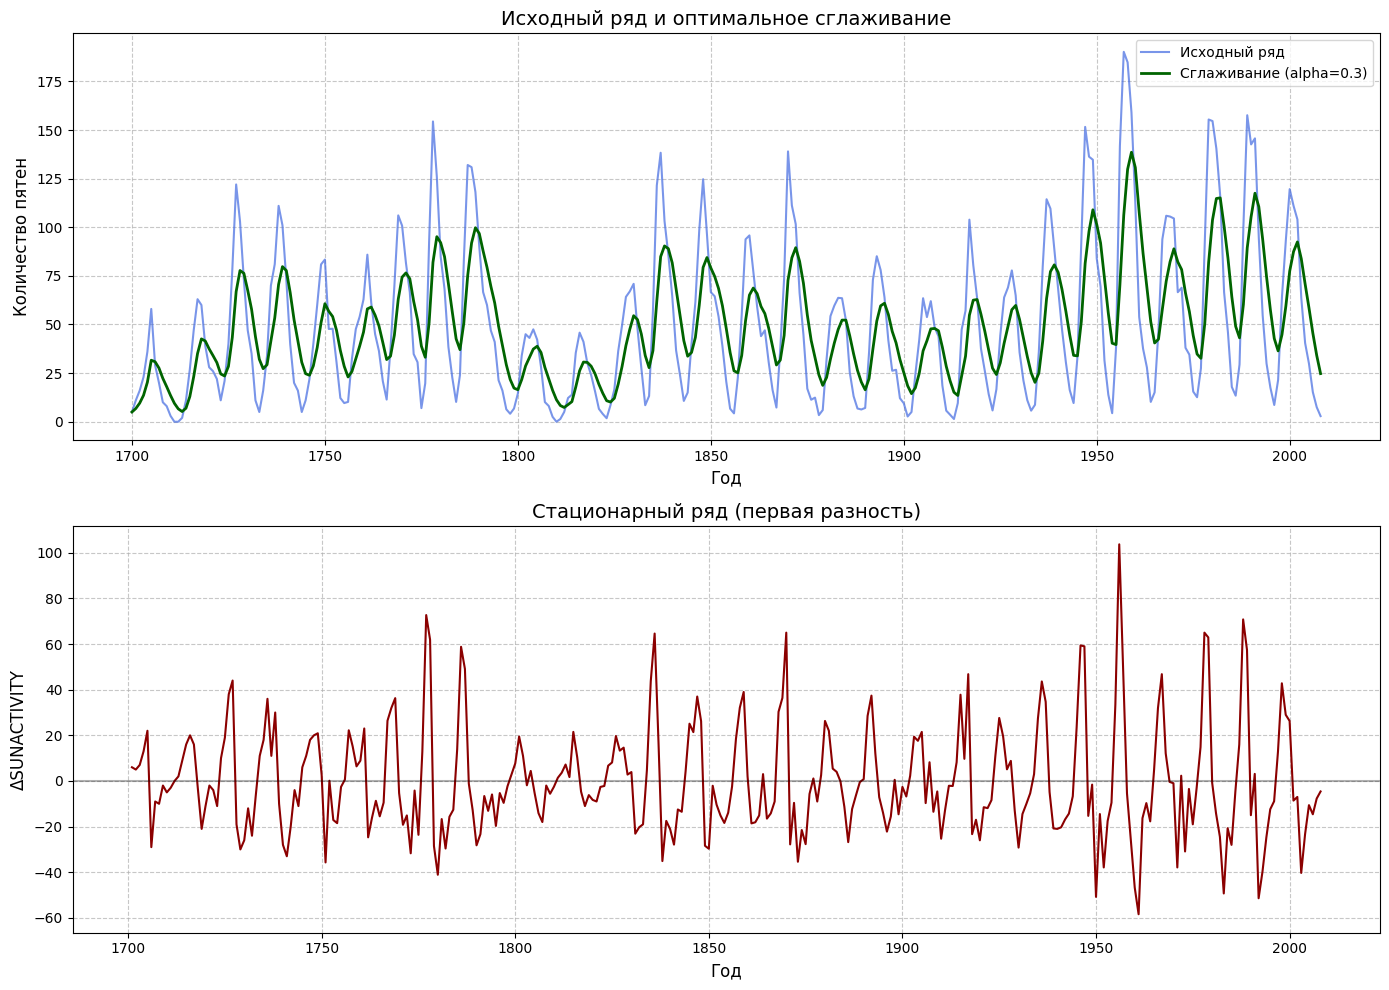

In [19]:
plt.figure(figsize=(14, 10))

# Лучшее сглаживание
best_smooth = exp_smooth(ts, 0.3)

# График 1: Исходный ряд и сглаживание
plt.subplot(2, 1, 1)
plt.plot(ts, label='Исходный ряд', color='royalblue', alpha=0.7)
plt.plot(best_smooth, label='Сглаживание (alpha=0.3)', color='darkgreen', linewidth=2)
plt.title('Исходный ряд и оптимальное сглаживание', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество пятен', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# График 2: Первая разность
plt.subplot(2, 1, 2)
plt.plot(diff1, label='Первая разность', color='darkred')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Стационарный ряд (первая разность)', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('ΔSUNACTIVITY', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()